# 16.1 霍夫变换

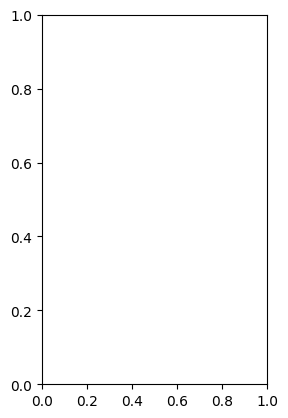

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

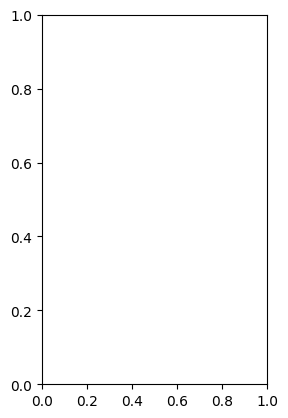

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
img = cv2.imread("../images/computer.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
orgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
oshow = orgb.copy()
lines = cv2.HoughLines(edges, 1, np.pi/180, 140)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)

x0 = a * rho
y0 = b * rho
x1 = int(x0 + 1000 * (-b))
y1 = int(y0 + 1000 * (a))
x2 = int(x0 - 1000 * (-b))
y2 = int(y0 - 1000 * (a))
cv2.line(orgb, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.subplot(121)
plt.show(oshow)
plt.axis('off')
plt.subplot(122)
plt.show(orgb)
plt.axis('off')

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread("../images/circle.jpg",0)

imgo = cv.imread("../images/circle.jpg",-1)
o = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
oshow = o.copy()
img = cv.medianBlur(img,5)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,300,
param1 = 50, param2 = 30, minRadius=100, maxRadius=200)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
	cv.circle(o, (i[0],i[1]), i[2], (255,0,0),12)
	cv.circle(o, (i[0],i[1]), 2, (255,0,0),12)
plt.subplot(121)
plt.imshow(oshow)
plt.axis('off')
plt.subplot(122)
plt.imshow(o)
plt.axis('off')
plt.show()